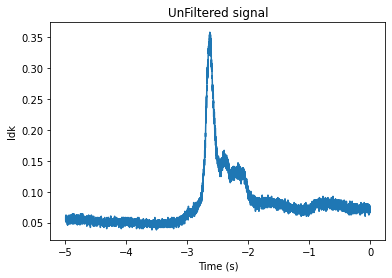

In [125]:
from scipy.signal import filtfilt
from scipy import stats
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

scope_num = 1
lab_num = 1
filename = f'data/Lab_{lab_num}/scope_{scope_num}.csv'
df = pd.read_csv(filename)

sensor_data = df[['channel_2']]

sensor_data = np.array(sensor_data)
time = np.array(df['x_axis'])

plt.plot(time, sensor_data)
plt.xlabel('Time (s)')
plt.ylabel('Idk')
plt.title('UnFiltered signal')
plt.show()


In [126]:
def band_pass_filter(signal):

    # Sampling Rate of data
    fs = len(signal) / 5

    # Range for filter
    lowcut = 0.01 # Tends to control how 'flat' the ends are
    highcut = 5 # Tends to control how much the graph resembles the original graph (higher = closer to original)

    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    order=2

    b,a = scipy.signal.butter(order,[low,high], 'bandpass', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)

    return(y)


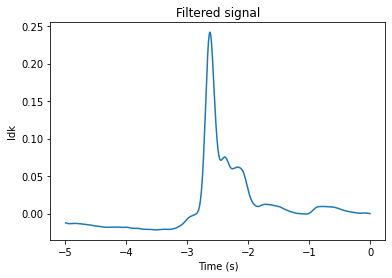

In [127]:
filtered_signal = band_pass_filter(sensor_data)
plt.plot(time, filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Idk')
plt.title('Filtered signal')
plt.show()